Importing the Libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the Dataset

In [14]:
dataset = pd.read_csv(r'C:\Users\hp\Downloads\Machine Learning\Machine Learning A-Z (Codes and Datasets)\Part 6 - Reinforcement Learning\Section 32 - Upper Confidence Bound (UCB)\Python\Ads_CTR_Optimisation.csv')
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


Implementing UCB

In [25]:
import math
N = 10000 # Number of rounds - i
d = 10 # Number of ads - n
ads_selected = []
numbers_of_selections = [0] * d # number of selections - Ni(n)
sums_of_rewards = [0] * d # list of total rewards - Ri(n)
total_reward = 0
upper_bound = []
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if(numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i] # r̄i(n)
            delta_i = math.sqrt((3/2)*math.log(n+1)/numbers_of_selections[i]) # ▲i(n)
            upper_bound = average_reward + delta_i # ▲i(n) + r̄i(n)
        else:
            upper_bound = 1e400
        if(max_upper_bound < upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

Visualising the Results

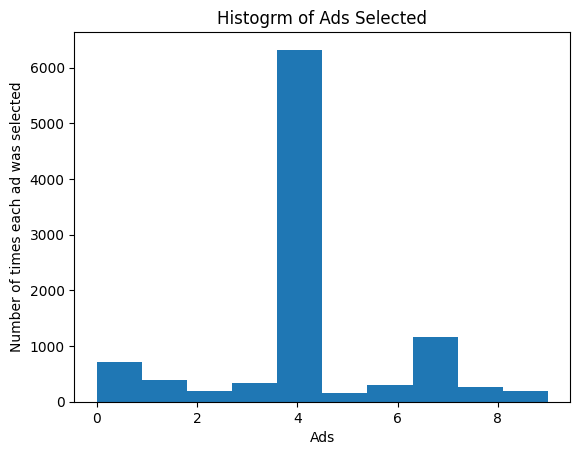

In [27]:
plt.hist(ads_selected)
plt.title('Histogrm of Ads Selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()